In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('clean_syd_sold_all.csv')

In [4]:
data_df = df.drop(['address','unitNumber','streetNumber','suburb','landSize','landUnit','schools','soldYear','propertyPrice','priceSource'],axis=1)

In [5]:
data_df.dtypes

soldPrice         int64
landArea        float64
postcode          int64
lat             float64
lng             float64
rooms             int64
baths             int64
parking           int64
propertyType     object
dtype: object

# one hot

In [6]:
propertyType_dummy = pd.get_dummies(data_df['propertyType'])
property_data = pd.concat([data_df,propertyType_dummy],axis=1)
property_data.drop('propertyType',axis=1,inplace=True)

In [7]:
property_data.columns

Index(['soldPrice', 'landArea', 'postcode', 'lat', 'lng', 'rooms', 'baths',
       'parking', 'acreageSemiRural', 'apartmentUnitFlat', 'blockOfUnits',
       'carspace', 'developmentSite', 'duplex', 'house', 'newApartments',
       'newHouseLand', 'newLand', 'rural', 'semiDetached', 'studio', 'terrace',
       'townhouse', 'vacantLand', 'villa'],
      dtype='object')

# Heat Map

In [8]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:>

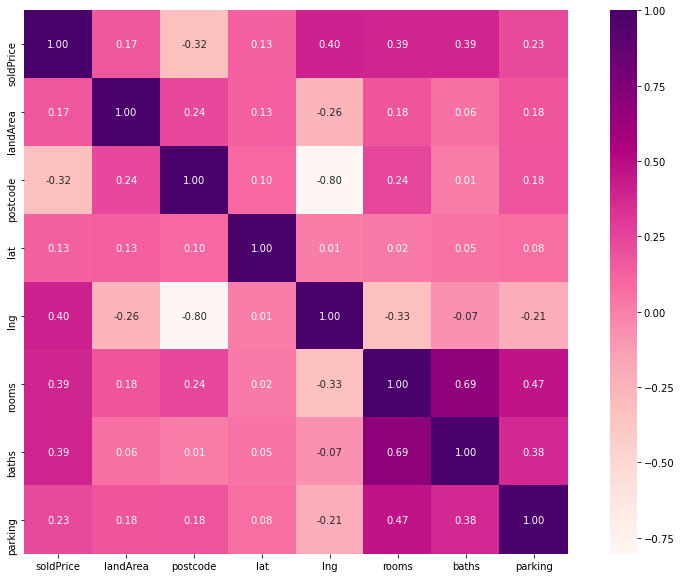

In [9]:
corrmatrix = data_df.drop('propertyType',axis=1).corr()
sns.heatmap(corrmatrix,square=True,annot=True,cmap='RdPu',fmt='.2f',annot_kws={'size':10})

<AxesSubplot:>

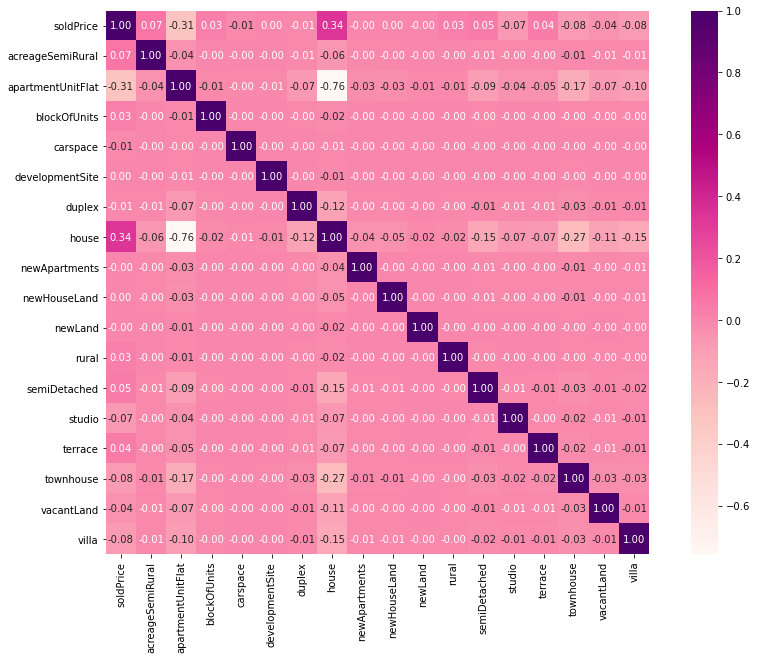

In [10]:
Type_data = pd.concat([data_df['soldPrice'],propertyType_dummy],axis=1)
corrmatrix = Type_data.corr()
sns.heatmap(corrmatrix,square=True,annot=True,cmap='RdPu',fmt='.2f',annot_kws={'size':10})

# Machine Learning

In [11]:
property_data.shape

(19931, 25)

In [12]:
feature_data = property_data.drop(['soldPrice'],axis=1)
target_data = property_data['soldPrice']

# Split the dataset into train data and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3,random_state = 2021)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

In [14]:
models=[LinearRegression(),KNeighborsRegressor(),Ridge(),DecisionTreeRegressor(),ExtraTreeRegressor(),XGBRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor()]
models_str=['LinearRegression','KNNRegressor','Ridge','DecisionTree','ExtraTree','XGBoost','RandomForest','AdaBoost','GradientBoost','Bagging']
score_list=[]
for name,model in zip(models_str,models):
    print('Start training model：'+name)
    model=model   
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)  
    score=model.score(X_test,y_test)
    score_list.append(score)
    print(name +' score:'+str(score))
    print()

Start training model：LinearRegression
LinearRegression score:0.6323890848176204

Start training model：KNNRegressor
KNNRegressor score:0.7917286634631318

Start training model：Ridge
Ridge score:0.632284494462309

Start training model：DecisionTree
DecisionTree score:0.6787392495921516

Start training model：ExtraTree
ExtraTree score:0.6745234679980991

Start training model：XGBoost
XGBoost score:0.8255197164933166

Start training model：RandomForest
RandomForest score:0.8166502398794072

Start training model：AdaBoost
AdaBoost score:0.4209893659567051

Start training model：GradientBoost
GradientBoost score:0.7742316406088237

Start training model：Bagging
Bagging score:0.805143830813578



In [15]:
model_performance_dict = {'model':models_str,'score':score_list}
model_score_df = pd.DataFrame.from_dict(model_performance_dict)
model_score_df.set_index('model',inplace=True)

In [16]:
model_score_df.sort_values(by='score',axis=0,ascending= False,inplace=True)
model_score_df

,score
model,
XGBoost,0.825520
RandomForest,0.816650
Bagging,0.805144
KNNRegressor,0.791729
GradientBoost,0.774232
DecisionTree,0.678739
ExtraTree,0.674523
LinearRegression,0.632389
Ridge,0.632284


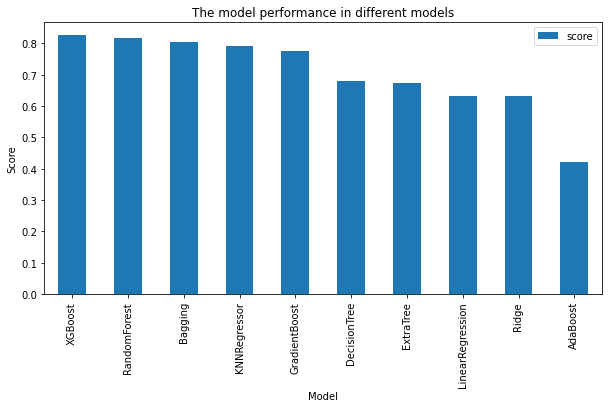

In [17]:
model_score_df.plot(kind='bar',figsize=(10,5))
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('The model performance in different models')
plt.show()